# TP2 : Étude de pendules.

## Exercice 1.- Pendule simple sans frottements.

Une masse ponctuelle $m$ est accrochée au bout d'une tige rigide de longueur $l$ (et de masse considérée nulle). On place l'origine du repère au point d'attache de la tige et on note $\theta$ l'angle orienté entre l'axe vertical et la tige. On rappelle que le mouvement du pendule est décrit par l'équation différentielle
$$ \tag{E}
\theta''(t) + \frac{g}{l} \sin ( \theta(t) ) = 0 \: ,
$$
où $g = 9.80665$ est l'accélération de la pesanteur à la surface de la Terre. On prendra $l = 0.3$ ($30$ cm). On pose $\omega_0 = \sqrt{\frac{g}{l}}$.

![](simplePenduleFig.png)

1. En posant $v = \theta^\prime$, mettre l'équation différentielle $(E)$ sous la forme d'un système différentiel $(E_1)$ d'ordre $1$ portant sur $\displaystyle \left( \begin{array}{c}
\theta \\ 
v
\end{array} \right)$.

2. Modifier la fonction `pointMilieu1D` implémentée dans le précédent TP en une fonction `pointMilieuMultiD` afin de traiter le cas multidimensionnel $y \in \mathbb{R}^d$, $d \in \mathbb{N}^\ast$. La fonction `pointMilieuMultiD` aura les mêmes arguments et la même structure que dans le cas $1D$, sauf que `y0` sera maintant un `numpy array`. On retrouvera ainsi la dimension $d$ par `d = y0.size`. La fonction renverra une liste `[tps, sol]` où `tps` est toujours le vecteur $[t_0, \ldots, t_N]$ et `sol` est un `numpy ndarray` de taille `(tps.size, y0.size)`. 

*En faisant attention, il suffit de modifier légèrement deux lignes ...*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

3. Résoudre numériquement $(E)$ en utilisant le schéma du Point Milieu sur l'intervalle $[0, T]$, avec `T = 10` et un pas de temps `h = 0.001` et en prenant comme condition initiale $\theta(0) = \pi/4$ et $v(0) = \theta'(0) = 0$. Représenter $\theta$ et $v = \theta^\prime$ en fonction du temps sur une première fenêtre graphique. Recommencer pour différentes valeurs de $\theta(0)$ et $v(0)$.

*Lorsque vous définissez `secondMembre(t,y)`, faites attention : `y` est un `numpy.array([theta, v])` de taille $2$ et `secondMembre` renvoie un `numpy array` de taille $2$.*

4. On veut à présent représenter la solution approchée dans le plan $(\theta, v)$ (aussi appelé plan de phase...). Dans une nouvelle fenêtre graphique, tracer la courbe $(\theta(t), v(t))$, $t \in [0,T]$  ou plus exactement, $t \in $ `tps` (pour $\theta(0) = \pi/4$ et $v(0) = \theta'(0) = 0$ par exemple). Ajouter sur la même figure les courbes correspondant aux conditions initiales $\theta(0) \in \{ 0, 2\pi \}$ et $v(0) \in \left\lbrace \sqrt{\frac{2g}{l}}, \sqrt{\frac{4g}{l}}, \sqrt{\frac{6g}{l}} \right\rbrace$.

*C'est assez simple : si on veut représenter une courbe paramétrée $(x(t), y(t))$ sur un intervalle $t \in [0,T]$ et qu'on connaît $x$ et $y$ sur un vecteur de temps `tps` qui discrétise régulièrement $[0,T]$, il suffit de tracer `y[tps]` en fonction de `x[tps]`. Vous devriez obtenir le tracé suivant, en utilisant la commande `plt.axis([-10, 20, -15, 15])` afin d'ajuster la fenêtre :*

![](portraitPenduleSimple.png)


5. On introduit l'énergie mécanique du pendule $E_m$ qui doit être constante en l'absence de frottements, comme vous l'avez peut-être vu en mécanique un jour ...
$$
E_m = \underbrace{\frac{1}{2} m (l \theta^\prime)^2}_{\text{énergie cinétique}}  \underbrace{- mg l \cos \theta}_{\text{énergie potentielle}} = m l^2 E(\theta,v) \: .
$$
Sur une même figure, représenter l'énergie mécanique du système en fonction du temps pour chacune des solutions calculées à la question précédente. 

*Pour chaque solution $(\theta, v)$, on demande de représenter $t \in$ `tps` $\mapsto E(\theta(t), v(t))$.* 

6. Vérifier que $\displaystyle E(\theta,v) = \frac{1}{2} v^2 - \frac{g}{l} \cos \theta$ est constante le long des solutions $(\theta(t), v(t))_{t \in [0,T]}$ (par un calcul théorique cette fois).

*Indication : calculer $\displaystyle \dfrac{d}{dt} E (\theta(t),v(t))$.*

7. On appellera *orbite* $\mathcal{O}_{(\theta_0, v_0)}$ passant par $(\theta_0, v_0)$  l'image de la solution maximale $(\theta, v)$ définie sur un intervalle $J$ et telle que $(\theta(0), v(0)) = (\theta_0, v_0)$, c'est-à-dire
$$
\mathcal{O}_{(\theta_0, v_0)} = \{ (\theta(t), v(t)) \in \mathbb{R}^2 \: : \: t \in J \} \: .
$$
Utiliser la question précédente pour montrer qu'une orbite de $(E_1)$ est toujours incluse dans une ligne de niveau de $E$ i.e. dans un ensemble de la forme
$$
\mathcal{E}_c := \{ (x_1,x_2) \in \mathbb{R}^2 \: : \: E(x_1,x_2) = c \}  \quad \text{pour } c \in \mathbb{R} \: .
$$
Relier $c$ et $(\theta_0, v_0)$.


8. Représenter sur une première figure quelques lignes de niveaux de $E$ grâce à la fonction `plt.contour`. Afin de comparer au portrait de phase obtenu à la question $4$, sur une nouvelle figure, représenter les lignes de niveaux correspondant aux orbites représentées à la question $4$ : pour cela, aidez-vous de la relation établie entre $c$ et $(\theta_0, v_0)$ à la question précédente.

*Lisez attentivement la section **Aide** à la fin du notebook concernant `plt.contour` et `np.meshgrid` ou utilisez l'aide en ligne de `matplotlib`.*

## Exercice 2.- Un pendule double

Le pendule double étudié ici consiste en un pendule (c'est-à-dire une tige de masse nulle et de longueur $l_1$ à laquelle est accrochée une masse $m_1$) à l'extrémité duquel on accroche un autre pendule (tige de longueur $l_2$ à laquelle est accrochée une masse $m_2$). On note $\theta_1$ l'angle que la première tige fait avec l'axe vertical, et $\theta_2$ l'angle que fait la deuxième tige avec l'axe vertical. On placera par la suite l'origine du repère au point d'attache de la première tige.

![](doublePenduleFig.png)

On admettra que le mouvement du pendule est régi par le système d'équations différentielles $(E_2)$ :

$$
\begin{align*}
\theta_1^{''} & = \frac{( - m_2)l_1 \sin( \theta_1 - \theta_2) \cos (\theta_1 - \theta_2) (\theta_1^\prime )^2 - m_2 l_2 \sin (\theta_1 - \theta_2) (\theta_2^\prime )^2 - m_1 g \sin \theta_1 - m_2 g \sin (\theta_1 - \theta_2) \cos (\theta_2)}{l_1 \left(m_1 + m_2 \sin^2 (\theta_1 - \theta_2)\right)} \\
\theta_2^{''} & = \frac{(m_1 + m_2)l_1 \sin( \theta_1 - \theta_2) (\theta_1^\prime )^2 + m_2 l_2 \sin (\theta_1 - \theta_2) \cos (\theta_1 - \theta_2) (\theta_2^\prime )^2 + (m_1 + m_2) g \sin (\theta_1-\theta_2) \cos (\theta_1) }{l_2 \left(m_1 + m_2 \sin^2 (\theta_1 - \theta_2)\right)}
\end{align*}
$$

1. En posant $v_1 = \theta_1^\prime$ et $v_2 = \theta_2^\prime$, ramener le système $(E_2)$ à un système différentiel $(E_4)$ non linéaire d'ordre $1$ à $4$ équations.


2. On fixe les valeurs des paramètres à `l1=1`; `m1=2`; `l2=1`; `m2=1`; `g=9.80665`, définir une fonction `penduleDouble` qui prend en argument une vecteur de taille $4$ et renvoie un vecteur de taille $4$ définissant le second membre de $(E_4)$. Afin d'éviter les erreurs de saisie on pourra utiliser les lignes suivantes :

In [2]:
# parametres
g = 9.80665
l1 = 1.
l2 = 1.
m1 = 2.
m2 =1.
    
""" En posant y1 = theta1 et y2 = theta2 on donne
theta1'' = ( (-m2)*l1*np.sin(y1-y2)*np.cos(y1-y2)*y3**2 - m2*l2*np.sin(y1-y2)*y4**2 - m1*g*np.sin(y1) - m2*g*np.sin(y1-y2)*np.cos(y2) )/(l1*(m1+m2*np.sin(y1-y2)**2 ))
theta2'' = ( (m1+m2)*l1*np.sin(y1-y2)*y3**2 + m2*l2*np.sin(y1-y2)*np.cos(y1-y2)*y4**2 + (m1+m2)*g*np.sin(y1-y2)*np.cos(y1) )/(l2*( m1+m2*np.sin(y1-y2)**2 ))
"""

" En posant y1 = theta1 et y2 = theta2 on donne\ntheta1'' = ( (-m2)*l1*np.sin(y1-y2)*np.cos(y1-y2)*y3**2 - m2*l2*np.sin(y1-y2)*y4**2 - m1*g*np.sin(y1) - m2*g*np.sin(y1-y2)*np.cos(y2) )/(l1*(m1+m2*np.sin(y1-y2)**2 ))\ntheta2'' = ( (m1+m2)*l1*np.sin(y1-y2)*y3**2 + m2*l2*np.sin(y1-y2)*np.cos(y1-y2)*y4**2 + (m1+m2)*g*np.sin(y1-y2)*np.cos(y1) )/(l2*( m1+m2*np.sin(y1-y2)**2 ))\n"

3. Calculer les coordonnées $(x_1,y_1)$ et $(x_2,y_2)$ de la masse $m_1$ et de la masse $m_2$ dans le repère dont l'origine est le point d'attache du premier pendule. Écrire une fonction `coord1` qui prend en argument l'angle $\theta_1$ et renvoie les coordonnées $(x_1,y_1)$ et une fonction `coord2` qui prend en argument les angles $\theta_1$ et $\theta_2$ et renvoie les coordonnées $(x_2,y_2)$. Vérifier que vous obtenez bien les coordonnées attendues pour des valeurs de $(\theta_1,\theta_2)$ particulières ($\theta_1=\theta_2=0$ ou $\theta_1=0$ et $\theta_2=\pi/2$ par exemple).


4. On lâche le pendule tendu avec un angle de $60^\circ$ ($\theta_1 (0) = \theta_2(0) = 2\pi/3$) et sans vitesse initiale ($\theta_1^\prime(0)=\theta_2^\prime(0)=0$). Calculer une approximation de l'évolution de $\theta_1$ et $\theta_2$ en utilisant le schéma du Point Milieu, sur un intervalle de temps $[0,20]$ uniformément discrétisé avec un pas de temps $h=0.005$. Représenter les trajectoires $(x_i(t), y_i(t))_{t \in [0,T]}$, $i=1,2$ des masses $m_1$ et $m_2$ obtenues.

5. *Pour ceux qui ont le temps.* Réaliser une animation montrant le mouvement de l'ensemble du pendule.

## Exercice 3.- Pendule amorti

Reprendre l'étude effectuée dans le premier exercice en ajoutant une force de frottement d'intensité proportionnelle (coefficient $k>0$) à la vitesse du pendule :
$$
\theta''(t) + k \theta^\prime(t) + \frac{g}{l} \sin ( \theta(t) ) = 0 \:.
$$

## Aide 

*Exemples d'utilisation des fonctions `np.meshgrid`, `plt.contour`.*

- `np.meshgrid` : la fonction `np.meshgrid`permet de créer une grille de la fenêtre dans laquelle on souhaite tracer les lignes de niveaux. Étant donnés un `np.array x` discrétisant les abscisses et un `np.array x` discrétisant les ordonnées, on va former tous les couples possibles $(x_i, y_j)_{i,j}$ et renvoyer la matrice `np.ndarray gx` des abscisses ainsi que la matrice `np.ndarray gy` des ordonnées. Testons sur un exemple :

In [3]:
x = np.linspace(0,5,6)
y = np.linspace(-5,0,6)
gx,gy = np.meshgrid(x,y)

# Voyons ce que ça donne ...
print("x = "+str(x)+"   et   y = "+str(y)+"\n")
print("gx = "+str(gx)+"\n")
print("gy = "+str(gy))

x = [0. 1. 2. 3. 4. 5.]   et   y = [-5. -4. -3. -2. -1.  0.]

gx = [[0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]]

gy = [[-5. -5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.]]


*On représente ci-dessous les points d'abscisses `gx` et d'ordonnées `gy` :*

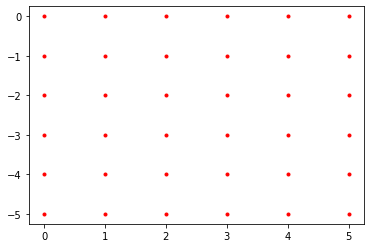

In [4]:
plt.plot(gx,gy,'.r')

- `plt.contour` : voici un exemple d'utilisation de `plt.contour` pour représenter des niveaux de la fonction $(x,y) \mapsto x^2 + 2y^2$. On commence par discrétiser la fenêtre dans laquelle on veux tracer les lignes de niveaux à l'aide de meshgrid. Plus on souhaite une précision fine sur les contours, plus il faut choisir une précision fine dans la discrétisation de cette fenêtre : ici concrètement, il faut assez de points dans les vecteurs `x` et `y`. Ensuite on évalue la fonction `f` en tous les points de la grille `gx,gy`, cela donne une grille de valeurs `gz` et la fonction `plt.contour` détermine les lignes de niveaux à partir de ces valeurs. On peut choisir de représenter les niveaux $\{ f(x,y) = c_i \}$, $i = 1, \ldots , m$ en l'indiquant en argument optionnel.


Text(0.5, 1.0, '100 par 100 points')

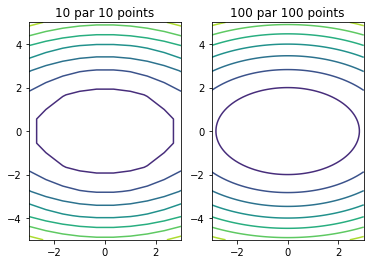

In [5]:
def f(x,y):
    return x**2 + 2*y**2

# Pas assez de points 10 par 10
x = np.linspace(-3,3,10)
y = np.linspace(-5,5,10)
gx, gy = np.meshgrid(x, y)
gz = f(gx, gy)
plt.subplot(1,2,1)
plt.contour(gx, gy, gz)
plt.title("10 par 10 points")

# Plus de points 100 par 100
x = np.linspace(-3,3,100)
y = np.linspace(-5,5,100)
gx, gy = np.meshgrid(x, y)
gz = f(gx, gy)
plt.subplot(1,2,2)
plt.contour(gx, gy, gz)
plt.title("100 par 100 points")


Text(0.5, 1.0, 'on choisit les niveaux $c_i$')

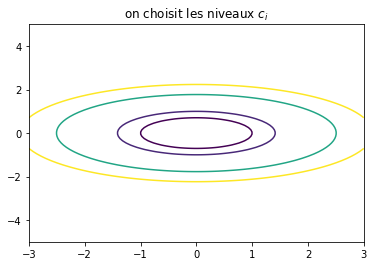

In [6]:
# On choisit les niveaux 
c = [1, 2, 2*np.pi, 10]
x  = np.linspace(-3,3,100)
y = np.linspace(-5,5,100)
gx, gy = np.meshgrid(x, y)
gz = f(gx, gy)
plt.contour(gx, gy, gz, c)
plt.title('on choisit les niveaux $c_i$')

Text(0.5, 1.0, 'Avec des labels')

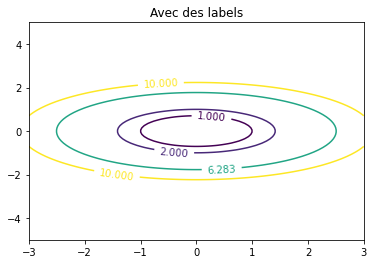

In [7]:
# On ajoute des labels ...
fig, ax = plt.subplots()
CS = ax.contour(gx, gy, gz, c)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Avec des labels')